In [1]:
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt 
import geopandas as gpd

# set default
pio.templates.default = "plotly_dark"

In [2]:
# read data
df = pd.read_csv('All_States_GE.csv')
df

ed_map = {
    "Others": 0,
    "Illiterate": 1,
    "Literate": 2,
    "5th Pass": 3,
    "8th Pass": 4,
    "10th Pass": 5,
    "12th Pass": 6,
    "Graduate": 7,
    "Graduate Professional": 8,
    "Post Graduate": 9,
    "Doctorate": 10
}

C:\Users\Rahul\AppData\Local\Temp\ipykernel_2900\2377711653.py:2: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('All_States_GE.csv')


In [3]:
fdf = df.dropna(subset=["Party", "Votes", "Constituency_No"])
fdf

,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,1.0,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,0.0,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,0.0,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,0.0,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,0.0,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,Mysore,3,23,1965,NaN,1,1,3,S.P.N.S.GAWDA,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91665,Uttar_Pradesh,3,76,1965,NaN,1,1,1,N.DEO,M,...,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91666,Uttar_Pradesh,3,76,1965,NaN,1,1,2,R.S.NIM,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91667,Uttar_Pradesh,3,76,1965,NaN,1,1,3,R.SINGH,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)


In [4]:
stateDict = {} # Assembly Number -> AState -> Constituency Number
uniqueStates = set()
for i in range(len(fdf)):
    elNum = fdf.iloc[i]["Assembly_No"]
    if elNum not in stateDict:
        stateDict[elNum] = {}

    state = fdf.iloc[i]["State_Name"]
    uniqueStates.add(state)
    if state not in stateDict[elNum]:
        stateDict[elNum][state] = {}

    conNum = fdf.iloc[i]["Constituency_No"]
    if conNum not in stateDict[elNum][state]:
        stateDict[elNum][state][conNum] = [0, 0, 0]
    
    if fdf.iloc[i]["Votes"] >= stateDict[elNum][state][conNum][0]:
        stateDict[elNum][state][conNum][0] = fdf.iloc[i]["Votes"]
        stateDict[elNum][state][conNum][1] = int(fdf.iloc[i]["Incumbent"])
        stateDict[elNum][state][conNum][2] = fdf.iloc[i]["Incumbent"]

stateDict

{17: {'Andaman_&_Nicobar_Islands': {1: [95308.0, 0, False]},
  'Andhra_Pradesh': {1: [562190.0, 0, False],
   2: [534544.0, 0, False],
   3: [578418.0, 0, False],
   4: [436906.0, 0, False],
   5: [586226.0, 0, False],
   6: [537630.0, 0, False],
   7: [485958.0, 0, False],
   8: [582024.0, 0, False],
   9: [449234.0, 0, False],
   10: [676809.0, 0, False],
   11: [572850.0, 0, False],
   12: [575498.0, 1, True],
   13: [587918.0, 1, True],
   14: [745557.0, 0, False],
   15: [598257.0, 0, False],
   16: [739202.0, 0, False],
   17: [720888.0, 0, False],
   18: [605462.0, 0, False],
   19: [695208.0, 0, False],
   20: [706602.0, 0, False],
   21: [783499.0, 1, True],
   22: [683830.0, 0, False],
   23: [722877.0, 0, False],
   24: [702211.0, 1, True],
   25: [686792.0, 0, False]},
  'Arunachal_Pradesh': {1: [225796.0, 1, True], 2: [153883.0, 0, False]},
  'Assam': {1: [473046.0, 0, False],
   2: [499414.0, 0, False],
   3: [381316.0, 0, False],
   4: [718764.0, 1, True],
   5: [484560.

In [5]:
stateAvgDict = {}
for state in uniqueStates:
    stateAvgDict[state] = {}
    for elNum in stateDict:
        if state in stateDict[elNum]:
            for conNum in stateDict[elNum][state]:
                if elNum not in stateAvgDict[state]:
                    stateAvgDict[state][elNum] = [0, 0]

                if stateDict[elNum][state][conNum][1] == 1:
                    stateAvgDict[state][elNum][0] += 1
                stateAvgDict[state][elNum][1] += 1

                

        
stateAvgDict

{'Odisha': {17: [3, 21],
  16: [8, 21],
  15: [5, 21],
  14: [11, 21],
  13: [14, 21],
  12: [4, 21],
  11: [11, 21],
  10: [9, 21],
  9: [3, 21],
  8: [12, 21],
  7: [5, 21],
  6: [6, 21],
  5: [5, 20],
  4: [5, 20],
  3: [0, 20]},
 'Jharkhand': {17: [8, 14], 16: [6, 14], 15: [3, 14], 14: [1, 14]},
 'Madhya_Pradesh': {17: [11, 29],
  16: [9, 29],
  15: [10, 29],
  14: [15, 29],
  13: [23, 40],
  12: [24, 40],
  11: [17, 40],
  10: [18, 40],
  9: [8, 40],
  8: [20, 40],
  7: [5, 40],
  6: [8, 40],
  5: [17, 37],
  4: [9, 37],
  3: [0, 36]},
 'Dadra & Nagar Haveli And Daman & Diu': {17: [0, 1]},
 'Dadra_&_Nagar_Haveli': {17: [0, 1],
  16: [1, 1],
  15: [0, 1],
  14: [1, 1],
  13: [1, 1],
  12: [1, 1],
  11: [1, 1],
  10: [1, 1],
  9: [0, 1],
  8: [0, 1],
  7: [0, 1],
  6: [1, 1],
  5: [0, 1],
  4: [0, 1]},
 'Arunachal_Pradesh': {17: [1, 2],
  16: [1, 2],
  15: [0, 2],
  14: [0, 2],
  13: [1, 2],
  12: [1, 2],
  11: [0, 2],
  10: [2, 2],
  9: [1, 2],
  8: [1, 2],
  7: [0, 2],
  6: [0, 2]

In [6]:
# sum it up
stateAvgDict2 = {}
for state in stateAvgDict:
    stateAvgDict2[state] = [0, 0]
    for elNum in stateAvgDict[state]:
        stateAvgDict2[state][0] += stateAvgDict[state][elNum][0]
        stateAvgDict2[state][1] += stateAvgDict[state][elNum][1]

stateAvgDict2

{'Odisha': [101, 312],
 'Jharkhand': [18, 56],
 'Madhya_Pradesh': [194, 546],
 'Dadra & Nagar Haveli And Daman & Diu': [0, 1],
 'Dadra_&_Nagar_Haveli': [7, 14],
 'Arunachal_Pradesh': [8, 24],
 'Gujarat': [171, 382],
 'Tripura': [10, 30],
 'Daman_&_Diu': [4, 9],
 'Chhattisgarh': [14, 44],
 'Punjab': [42, 204],
 'Sikkim': [3, 12],
 'Bihar': [240, 750],
 'Nagaland': [4, 14],
 'Tamil_Nadu': [145, 509],
 'Rajasthan': [114, 368],
 'Kerala': [128, 296],
 'Haryana': [42, 138],
 'Goa,_Daman_&_Diu': [3, 10],
 'Puducherry': [3, 14],
 'Delhi': [31, 103],
 'Uttar_Pradesh': [372, 1255],
 'Chandigarh': [5, 14],
 'Manipur': [11, 30],
 'Uttarakhand': [8, 20],
 'Maharashtra': [275, 711],
 'Karnataka': [150, 336],
 'Himachal_Pradesh': [22, 62],
 'Andaman_&_Nicobar_Islands': [8, 14],
 'Assam': [66, 182],
 'Andhra_Pradesh': [200, 612],
 'Mizoram': [5, 12],
 'Mysore': [22, 80],
 'Meghalaya': [11, 24],
 'West_Bengal': [307, 620],
 'Goa': [7, 18],
 'Jammu_&_Kashmir': [22, 78],
 'Telangana': [4, 17],
 'Madras'

In [7]:
stateAvgDictLast5 = {}
for state in stateAvgDict:
    stateAvgDictLast5[state] = [0, 0]
    for elNum in stateAvgDict[state]:
        if elNum < 13:
            continue
        stateAvgDictLast5[state][0] += stateAvgDict[state][elNum][0]
        stateAvgDictLast5[state][1] += stateAvgDict[state][elNum][1]

stateAvgDictLast5

{'Odisha': [41, 105],
 'Jharkhand': [18, 56],
 'Madhya_Pradesh': [68, 156],
 'Dadra & Nagar Haveli And Daman & Diu': [0, 1],
 'Dadra_&_Nagar_Haveli': [3, 5],
 'Arunachal_Pradesh': [3, 10],
 'Gujarat': [68, 130],
 'Tripura': [5, 10],
 'Daman_&_Diu': [3, 5],
 'Chhattisgarh': [14, 44],
 'Punjab': [18, 65],
 'Sikkim': [2, 5],
 'Bihar': [71, 214],
 'Nagaland': [2, 5],
 'Tamil_Nadu': [41, 195],
 'Rajasthan': [46, 125],
 'Kerala': [47, 100],
 'Haryana': [17, 50],
 'Goa,_Daman_&_Diu': [0, 0],
 'Puducherry': [0, 5],
 'Delhi': [14, 35],
 'Uttar_Pradesh': [140, 405],
 'Chandigarh': [3, 5],
 'Manipur': [4, 10],
 'Uttarakhand': [8, 20],
 'Maharashtra': [108, 240],
 'Karnataka': [65, 140],
 'Himachal_Pradesh': [9, 20],
 'Andaman_&_Nicobar_Islands': [1, 5],
 'Assam': [34, 70],
 'Andhra_Pradesh': [52, 193],
 'Mizoram': [2, 5],
 'Mysore': [0, 0],
 'Meghalaya': [6, 10],
 'West_Bengal': [104, 210],
 'Goa': [5, 10],
 'Jammu_&_Kashmir': [9, 30],
 'Telangana': [4, 17],
 'Madras': [0, 0],
 'Lakshadweep': [2,

In [8]:
outputDir = "./output/IncumbencyAnalysis/" 
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

mxNum = 0
for state in stateAvgDict:
    for elNum in stateAvgDict[state]:
        mxNum = max(mxNum, stateAvgDict[state][elNum][0] / stateAvgDict[state][elNum][1])

print(mxNum)
mxNum = np.ceil(mxNum) 


1.0


In [9]:
map1_to_2 = {
    "Andaman & Nicobar": "Andaman_&_Nicobar_Islands",
    "Daman and Diu and Dadra and Nagar Haveli": "Dadra & Nagar Haveli And Daman & Diu",
    "Madhya Pradesh": "Madhya_Pradesh",
    "Tamilnadu": "Tamil_Nadu",
    "Chhattishgarh": "Chhattisgarh",
    "Telengana": "Telangana",
    "Andhra Pradesh": "Andhra_Pradesh",
    "Himachal Pradesh": "Himachal_Pradesh",
    "Uttar Pradesh": "Uttar_Pradesh",
    "Arunachal Pradesh": "Arunachal_Pradesh",
    "West Bengal": "West_Bengal",
    "Jammu and Kashmir": "Jammu_&_Kashmir",
    "Ladakh": "Jammu_&_Kashmir"
}

map2_to_1 = {
    "Andaman_&_Nicobar_Islands": "Andaman & Nicobar",
    "Dadra & Nagar Haveli And Daman & Diu": "Daman and Diu and Dadra and Nagar Haveli",
    "Madhya_Pradesh": "Madhya Pradesh",
    "Tamil_Nadu": "Tamilnadu",
    "Chhattisgarh": "Chhattishgarh",
    "Telangana": "Telengana",
    "Andhra_Pradesh": "Andhra Pradesh",
    "Himachal_Pradesh": "Himachal Pradesh",
    "Uttar_Pradesh": "Uttar Pradesh",
    "Arunachal_Pradesh": "Arunachal Pradesh",
    "West_Bengal": "West Bengal",
    "Jammu_&_Kashmir": "Jammu and Kashmir",
    "Ladakh": "Jammu and Kashmir"
}

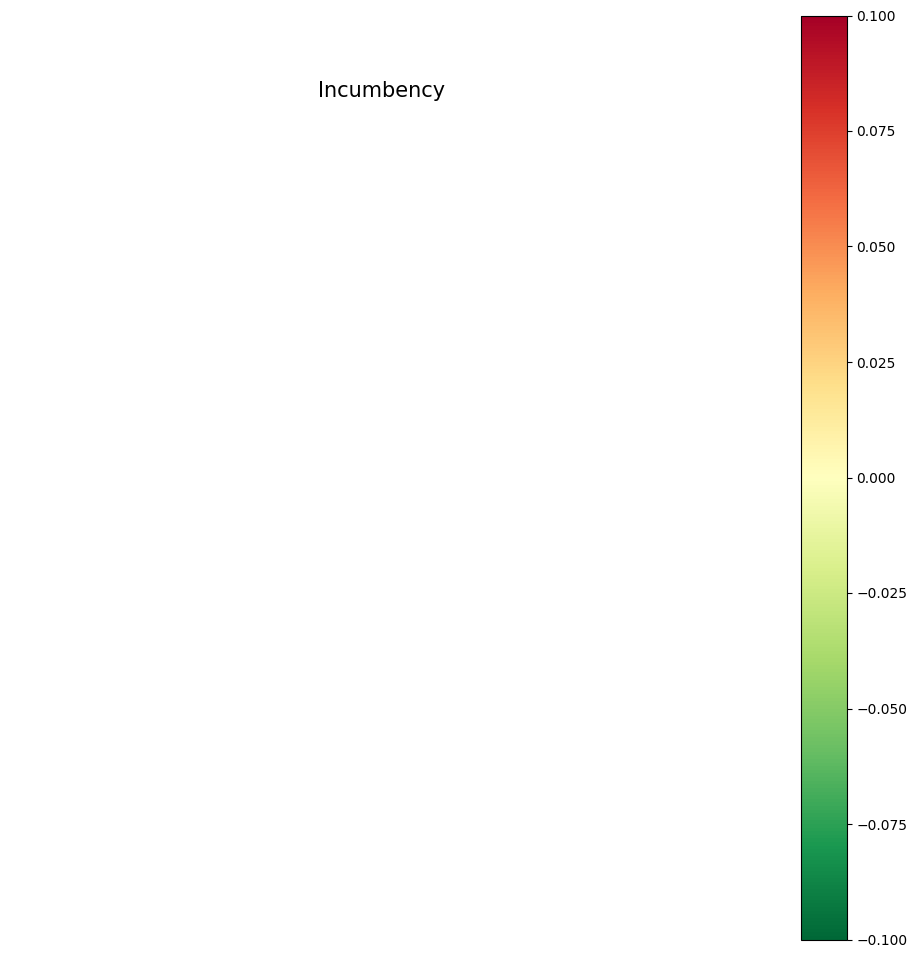

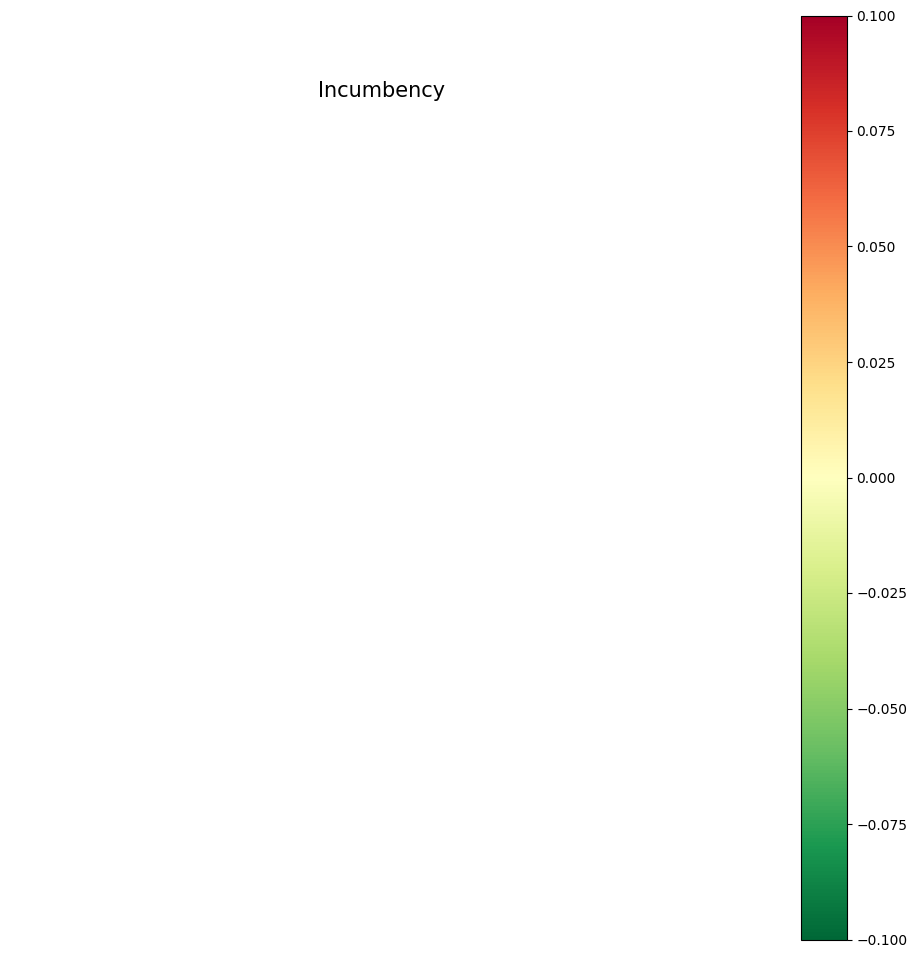

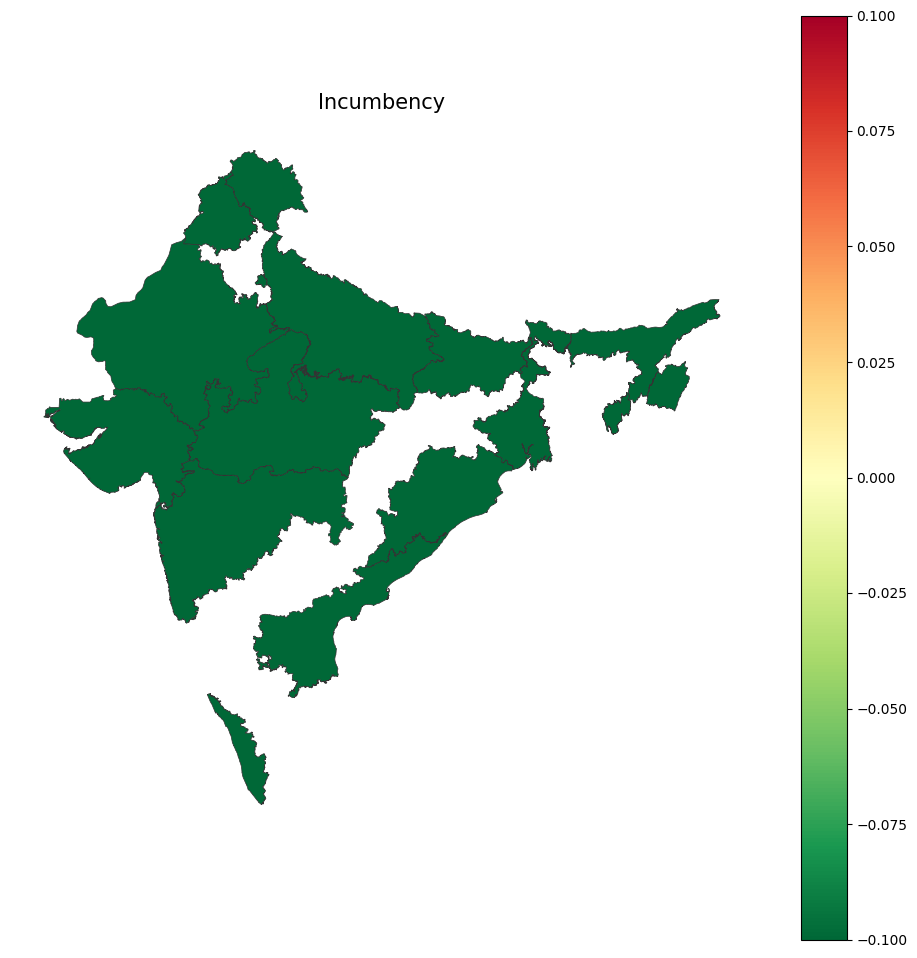

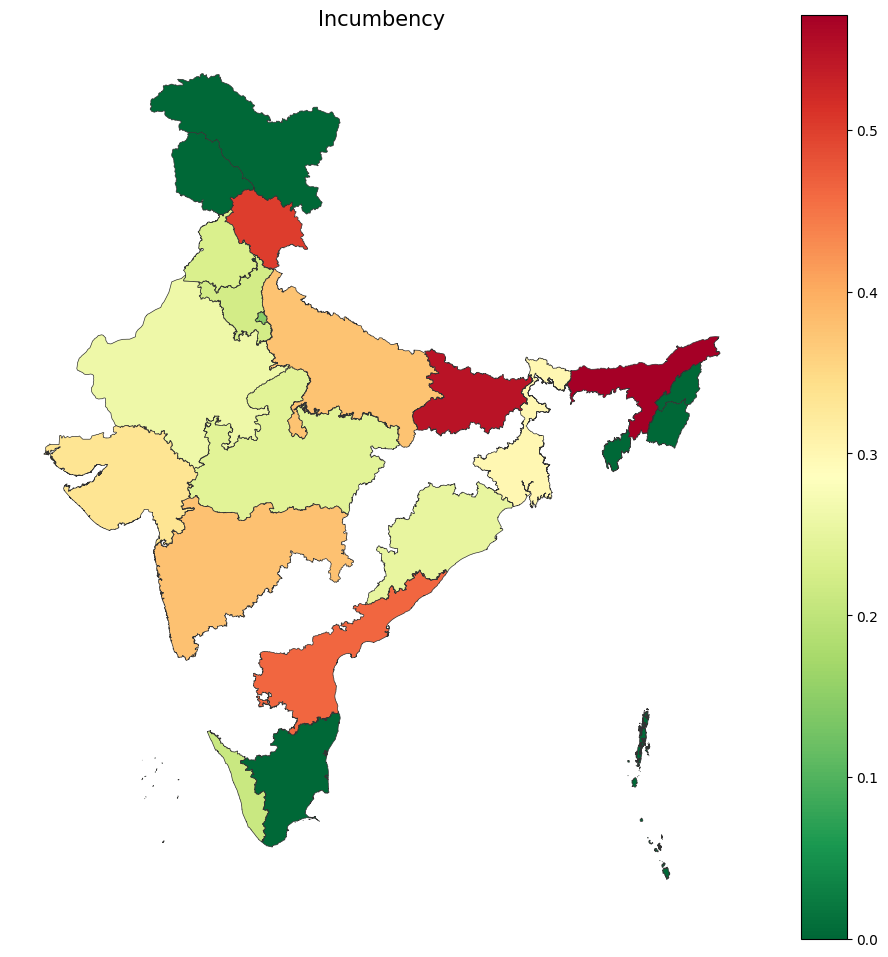

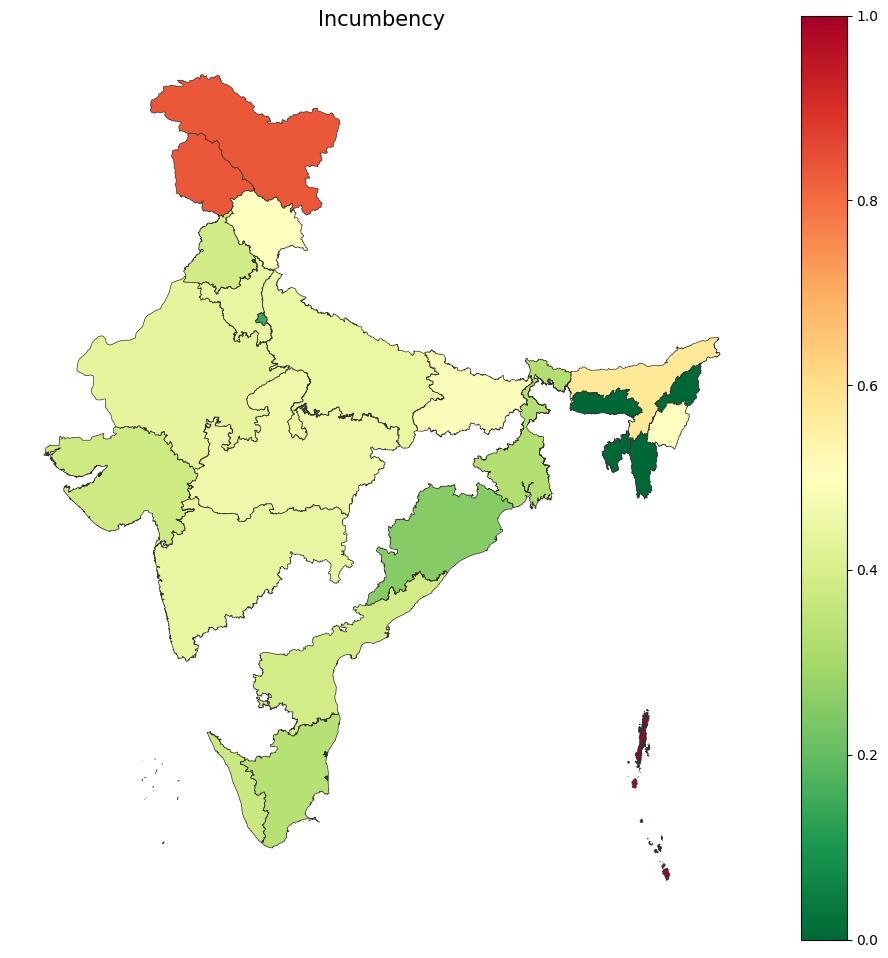

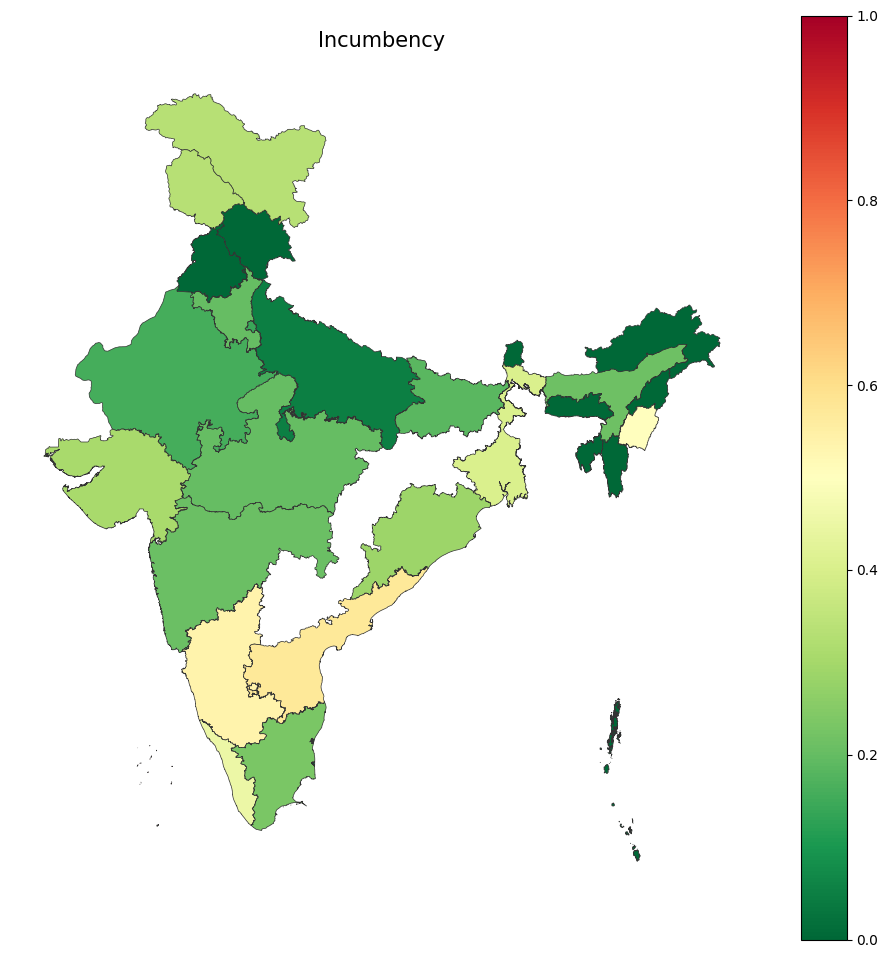

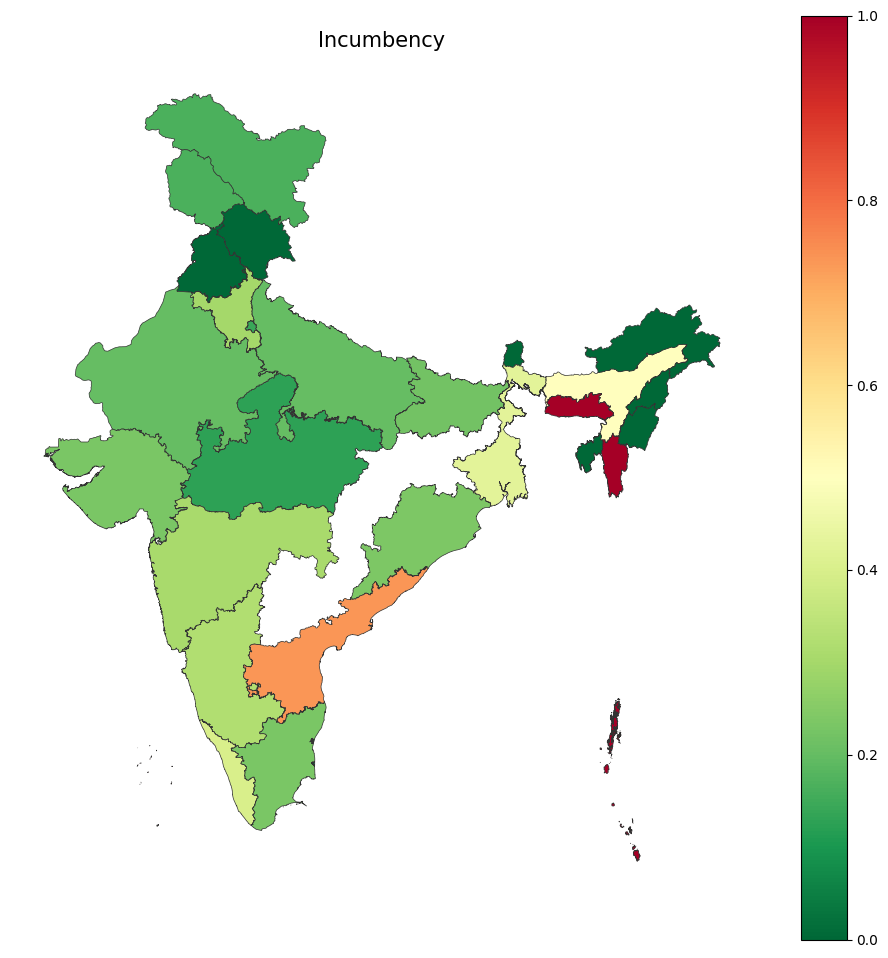

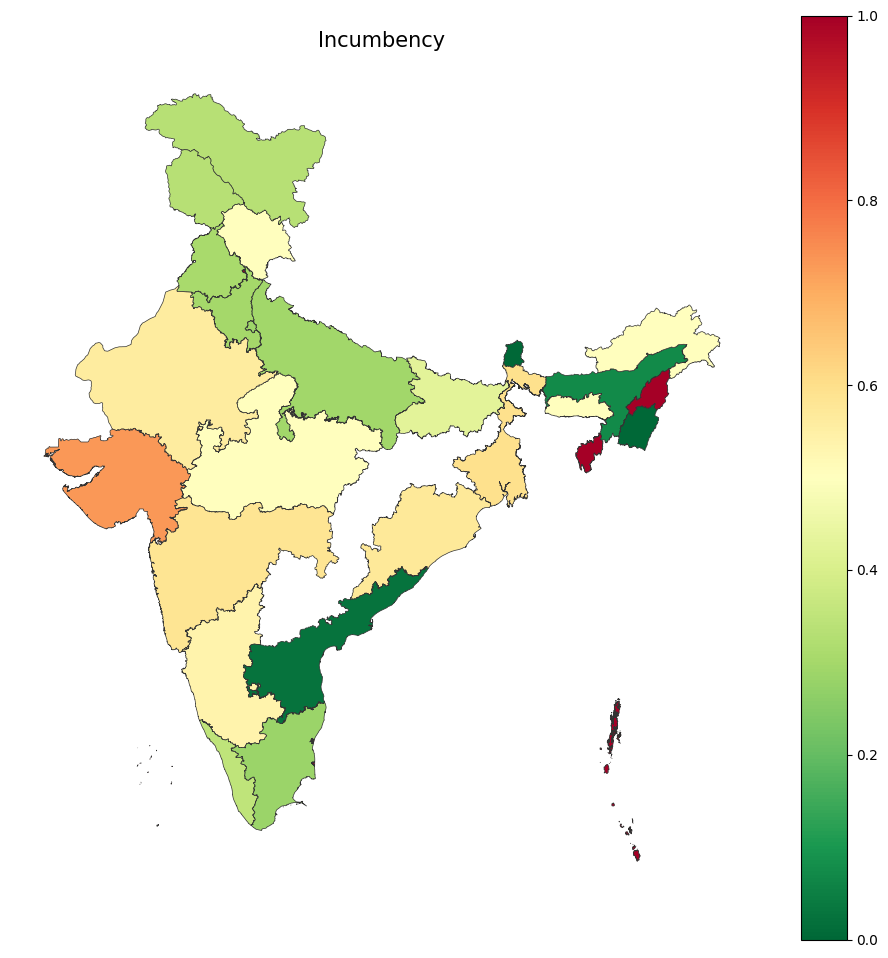

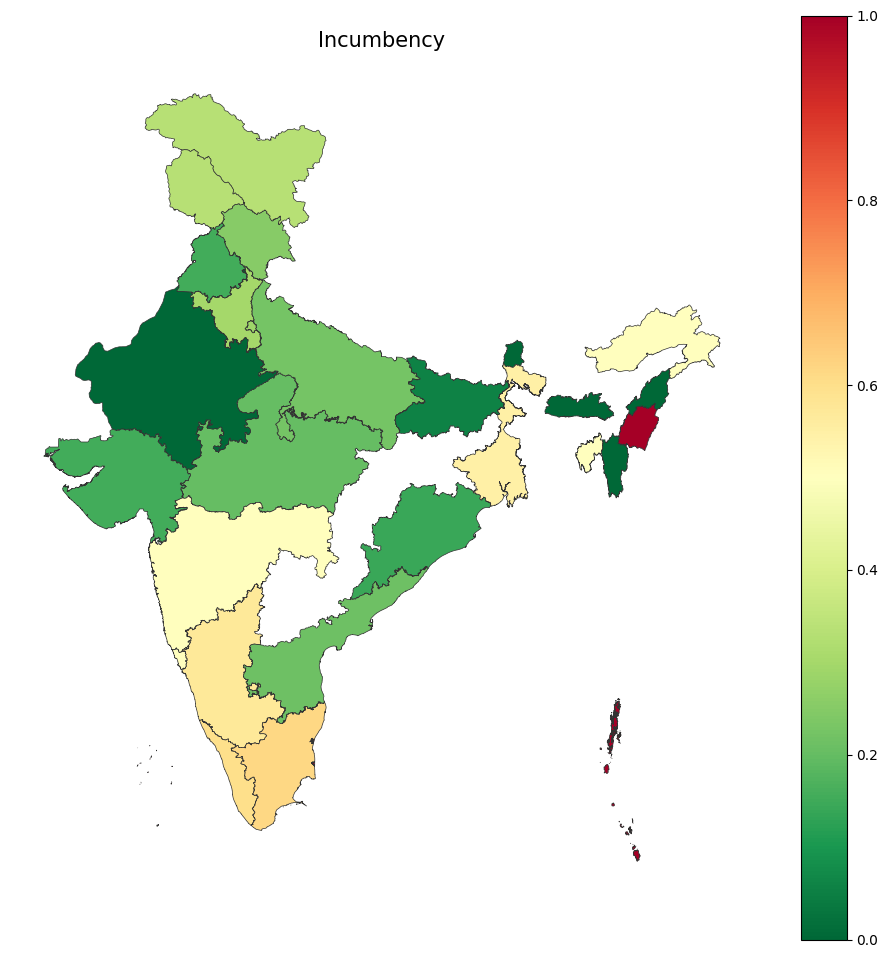

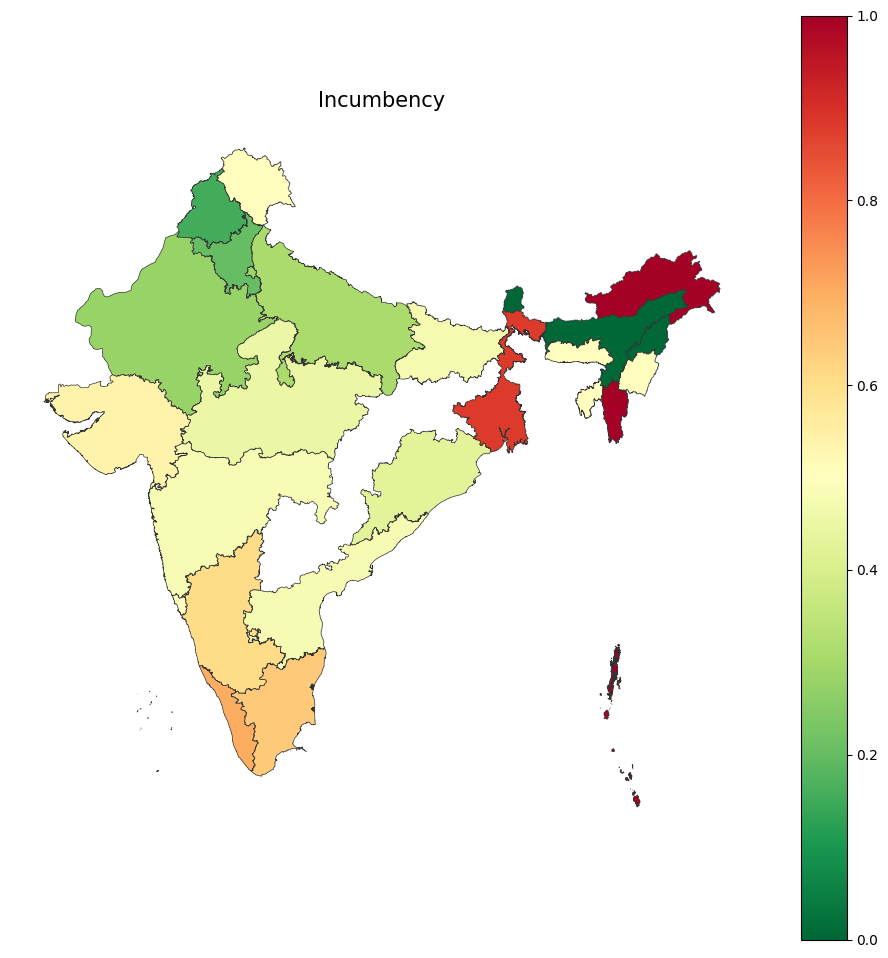

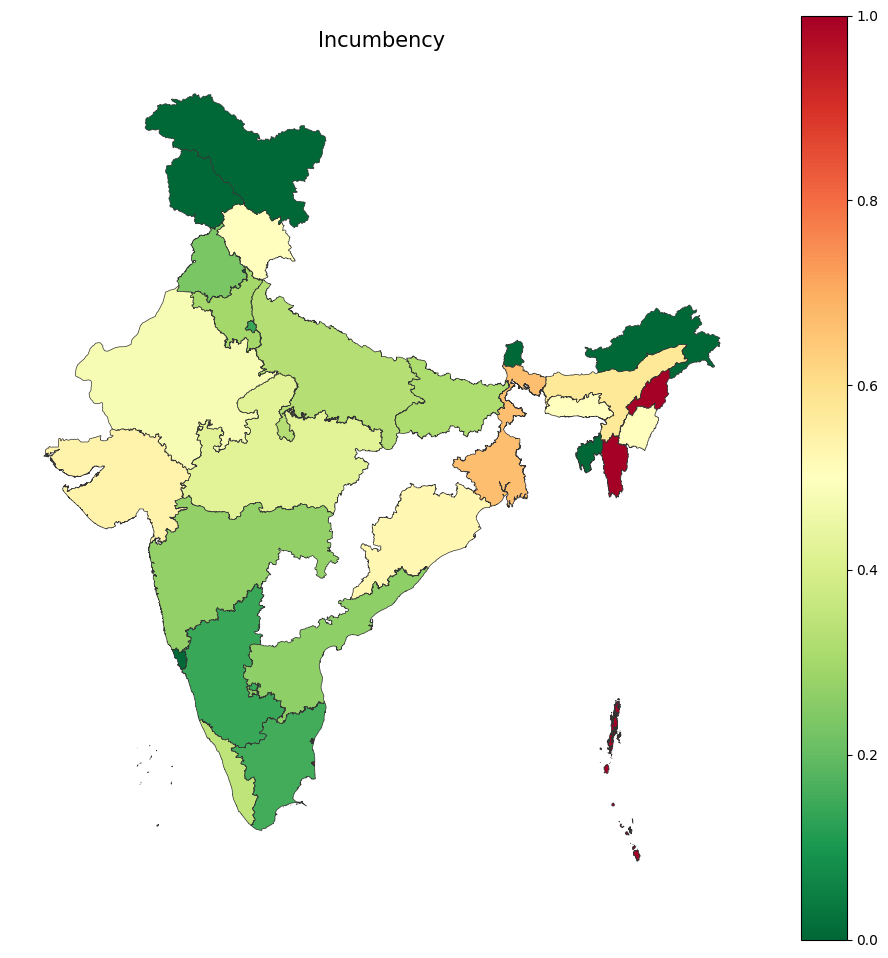

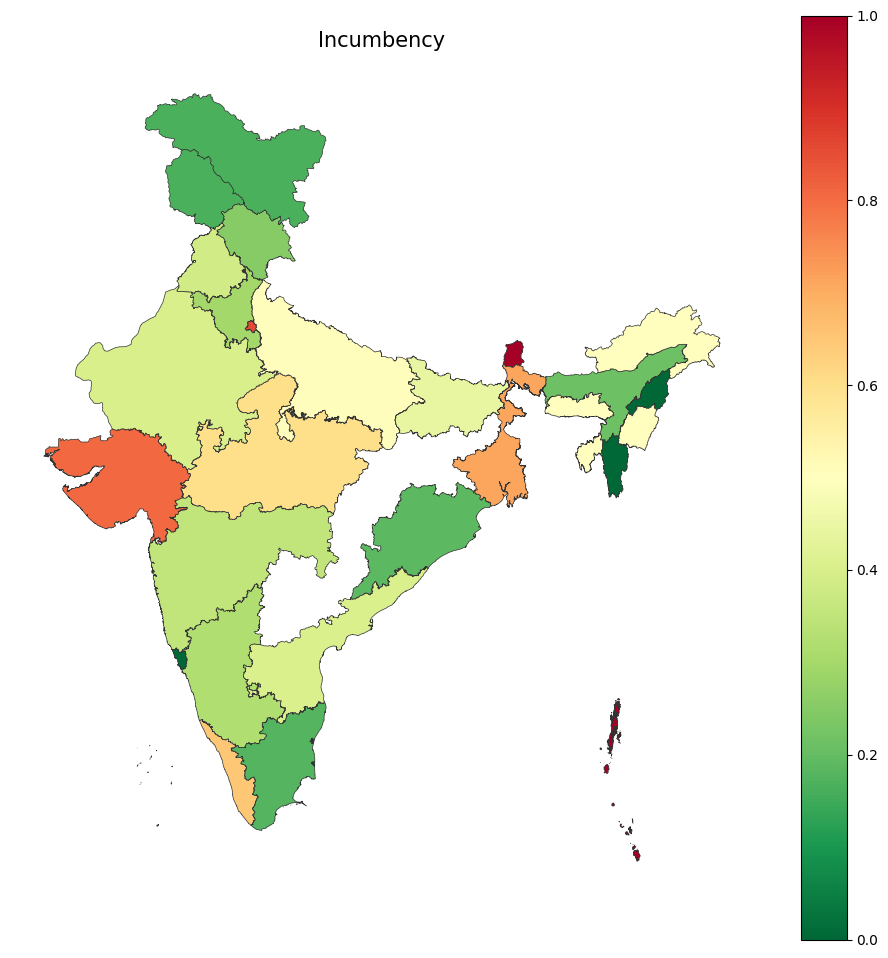

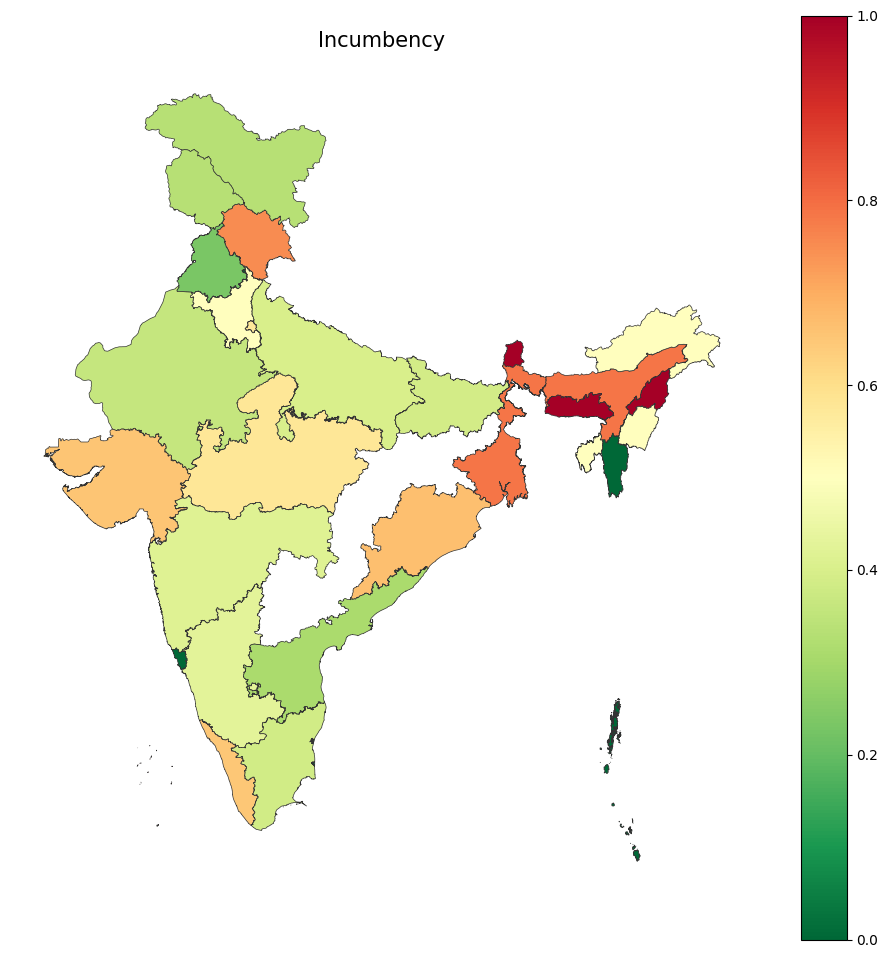

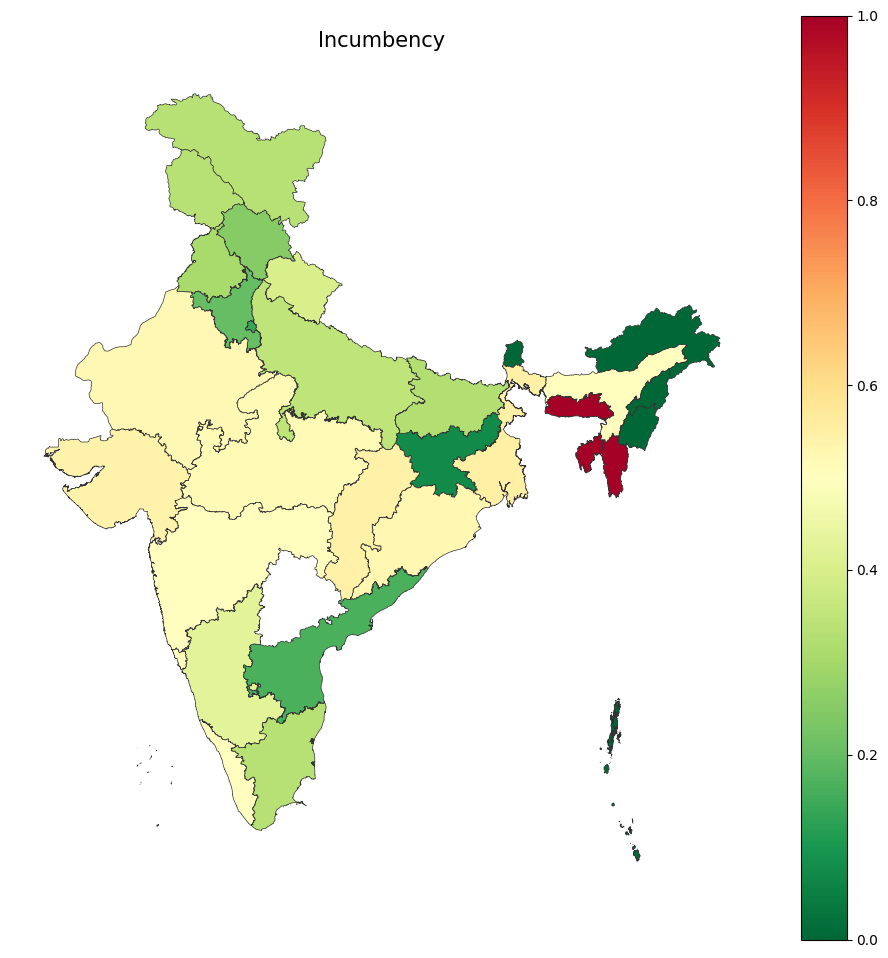

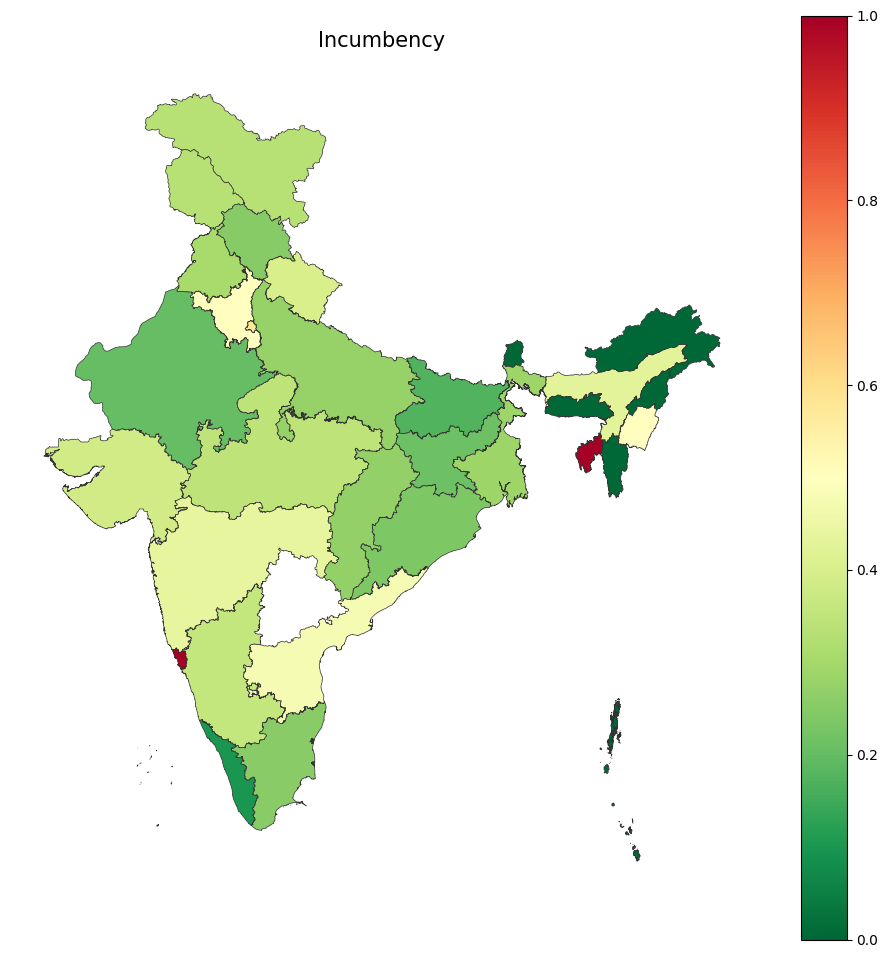

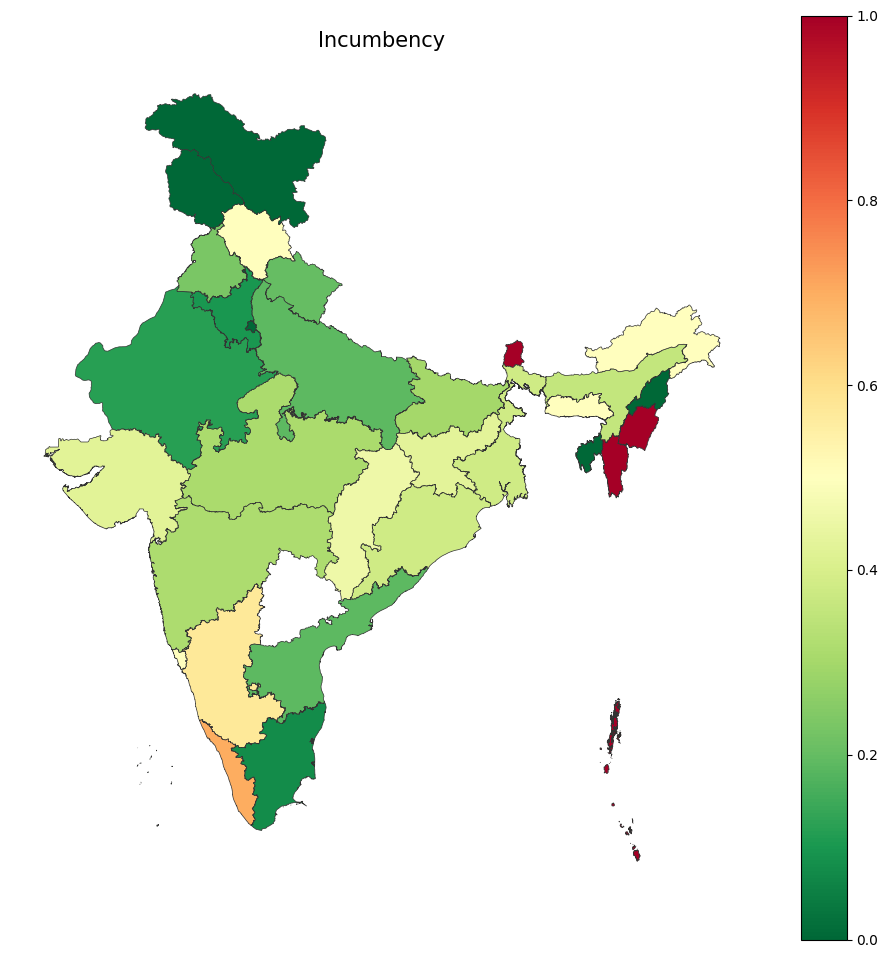

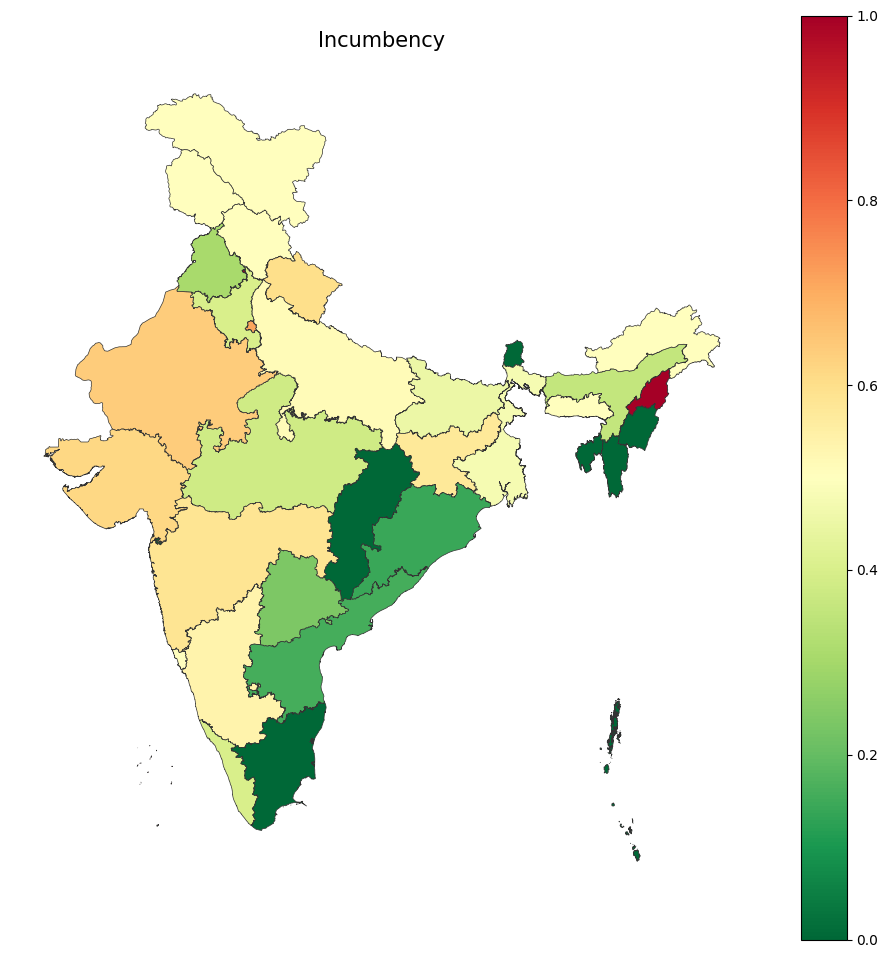

In [10]:
COL_NAME = "Incumbency"
geoPandasOutput = outputDir + "geoPandasOutput/"

if not os.path.exists(geoPandasOutput):
        os.makedirs(geoPandasOutput)


for elNum in range(1, 18):
    shpdf = gpd.read_file('./shapefile/India_State_Boundary.shp')
    # add empty column
    shpdf[COL_NAME] = np.nan
    # change statename
    for i in range(len(shpdf)):
        stateName = map1_to_2[shpdf.loc[i, 'State_Name']] if shpdf.loc[i, 'State_Name'] in map1_to_2 else shpdf.loc[i, 'State_Name']
        if stateName in stateAvgDict and elNum in stateAvgDict[stateName]:
            shpdf.loc[i, COL_NAME] = stateAvgDict[stateName][elNum][0] / stateAvgDict[stateName][elNum][1]

    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title(COL_NAME,
                fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = shpdf.plot(column=COL_NAME, cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
    # save
    fig.get_figure().savefig(geoPandasOutput + str(elNum) + ".png", dpi=300)

In [11]:
for elNum in range(1, 18):
    with open(outputDir + str(elNum) + ".txt", "w") as f:
        text = ""
        for state in stateAvgDict:
            if elNum in stateAvgDict[state]:
                text += f"INDIA\t{state.upper().replace('_', ' ').replace('ANDAMAN & NICOBAR', 'A & N')}\t{stateAvgDict[state][elNum][0] / stateAvgDict[state][elNum][1]}\n"

        text += f"INDIA\tUPPER\t{mxNum}\nINDIA\tLOWER\t0\n"
        f.write(text)

        


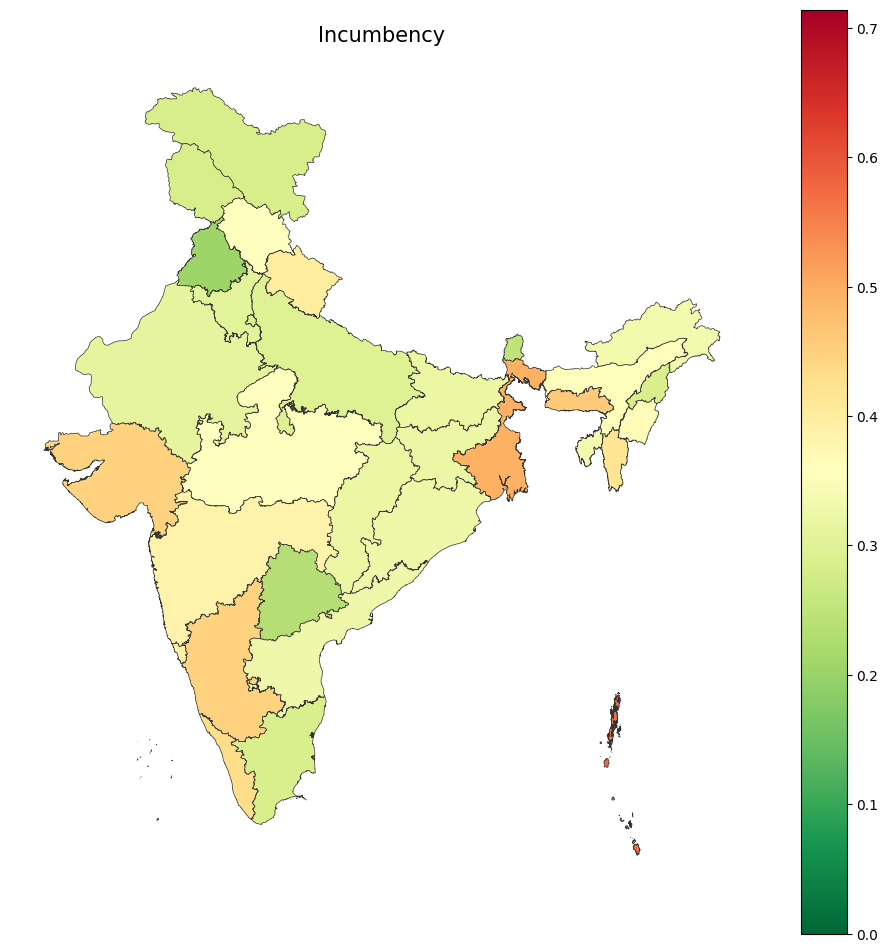

In [13]:
shpdf = gpd.read_file('./shapefile/India_State_Boundary.shp')
# add empty column
shpdf[COL_NAME] = np.nan
# change statename
for i in range(len(shpdf)):
    stateName = map1_to_2[shpdf.loc[i, 'State_Name']] if shpdf.loc[i, 'State_Name'] in map1_to_2 else shpdf.loc[i, 'State_Name']
    if stateName in stateAvgDict2:
        shpdf.loc[i, COL_NAME] = stateAvgDict2[stateName][0] / stateAvgDict2[stateName][1]

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title(COL_NAME,
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = shpdf.plot(column=COL_NAME, cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# save
fig.get_figure().savefig(geoPandasOutput + "Overall" + ".png", dpi=300)

In [14]:
# Overall
with open(outputDir + "overall.txt", "w") as f:
    text = ""
    for state in stateAvgDict2:
        text += f"INDIA\t{state.upper().replace('_', ' ').replace('ANDAMAN & NICOBAR', 'A & N')}\t{stateAvgDict2[state][0] / stateAvgDict2[state][1]}\n"

    text += f"INDIA\tUPPER\t{mxNum}\nINDIA\tLOWER\t0\n"
    f.write(text)

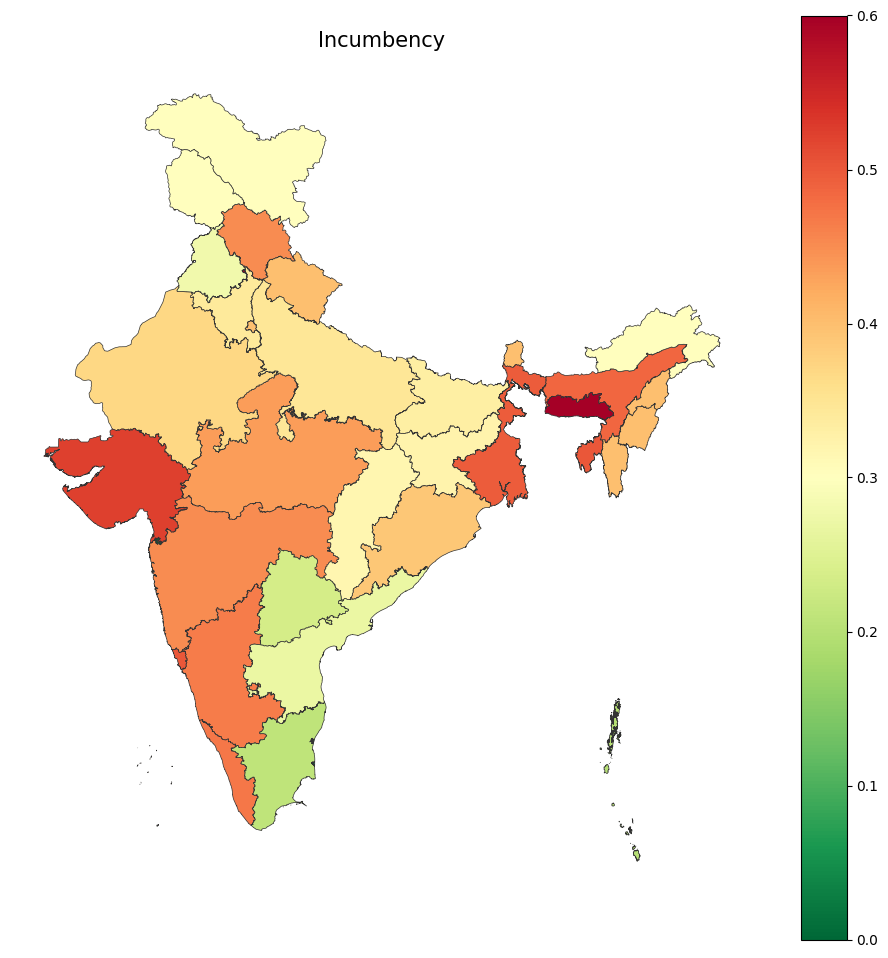

In [15]:
shpdf = gpd.read_file('./shapefile/India_State_Boundary.shp')
# add empty column
shpdf[COL_NAME] = np.nan
# change statename
for i in range(len(shpdf)):
    stateName = map1_to_2[shpdf.loc[i, 'State_Name']] if shpdf.loc[i, 'State_Name'] in map1_to_2 else shpdf.loc[i, 'State_Name']
    if stateName in stateAvgDictLast5:
        shpdf.loc[i, COL_NAME] = stateAvgDictLast5[stateName][0] / stateAvgDictLast5[stateName][1]

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title(COL_NAME,
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = shpdf.plot(column=COL_NAME, cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# save
fig.get_figure().savefig(geoPandasOutput + "Last5" + ".png", dpi=300)

In [16]:
# Last 5
with open(outputDir + "last5.txt", "w") as f:
    text = ""
    for state in stateAvgDictLast5:
        text += f"INDIA\t{state.upper().replace('_', ' ').replace('ANDAMAN & NICOBAR', 'A & N')}\t{stateAvgDictLast5[state][0] / (max(stateAvgDictLast5[state][1], 1))}\n"

    text += f"INDIA\tUPPER\t{mxNum}\nINDIA\tLOWER\t0\n"
    f.write(text)